In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import keras
from tensorflow.keras.layers import Conv2D, Dense , Dropout, MaxPooling2D , Flatten
from tensorflow.keras.models import Sequential
from keras.utils import np_utils

In [ ]:
df_train = pd.read_csv('train.csv')
mapp = pd.read_csv("emnist-balanced-mapping.txt", delimiter = ' ',index_col=0, header=None, squeeze=True)

In [ ]:
df_train.head()

In [ ]:
train_x = df_train.iloc[:,1:]
train_y = df_train.iloc[:,0]

In [ ]:
train_x = np.asarray(train_x)

In [ ]:
print ("train_x:",train_x.shape)

In [ ]:

def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

train_x = train_x.astype('float32')
train_x = np.apply_along_axis(rotate, 1, train_x)
train_x /= 255
for i in range(100, 109):
    plt.subplot(280+ (i+1))
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    plt.title(chr(mapp[train_y[i]]))
unique_items, num_classes = np.unique(x, return_counts=True)
train_y = np_utils.to_categorical(train_y, num_classes)

In [10]:
train_x = train_x.reshape(-1, 28, 28, 1)


In [15]:
model = Sequential()
model.add(Conv2D(64,activation='relu',kernel_size=(5,5),input_shape =(28,28,1)))
model.add(MaxPooling2D(strides=3))
model.add(Conv2D(32,activation='relu',kernel_size=(5,5)))
model.add(MaxPooling2D(strides=3))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes , activation='softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          51232     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
__________

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy' , metrics=['accuracy'])

In [18]:
history= model.fit(train_x,train_y,validation_split=0.3,epochs=10)

Train on 90239 samples, validate on 22560 samples
Epoch 1/10
90239/90239 [==============================] - 88s 972us/sample - loss: 1.8369 - acc: 0.4518 - val_loss: 0.9563 - val_acc: 0.6902
Epoch 2/10
90239/90239 [==============================] - 87s 968us/sample - loss: 1.1802 - acc: 0.6239 - val_loss: 0.8199 - val_acc: 0.7230
Epoch 3/10
90239/90239 [==============================] - 88s 974us/sample - loss: 1.0552 - acc: 0.6597 - val_loss: 0.7578 - val_acc: 0.7397
Epoch 4/10
90239/90239 [==============================] - 89s 991us/sample - loss: 0.9769 - acc: 0.6837 - val_loss: 0.7172 - val_acc: 0.7555
Epoch 5/10
90239/90239 [==============================] - 91s 1ms/sample - loss: 0.9315 - acc: 0.6980 - val_loss: 0.6789 - val_acc: 0.7647
Epoch 6/10
90239/90239 [==============================] - 92s 1ms/sample - loss: 0.8942 - acc: 0.7086 - val_loss: 0.6617 - val_acc: 0.7689
Epoch 7/10
90239/90239 [==============================] - 93s 1ms/sample - loss: 0.8621 - acc: 0.7187 - val_

In [34]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

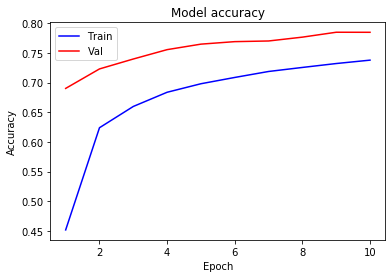

In [36]:
plotgraph(epochs, acc, val_acc)

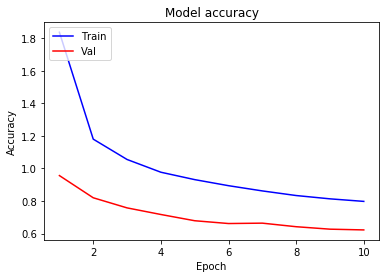

In [37]:
plotgraph(epochs, loss, val_loss)

In [39]:
model.save('Character Recignition.h5')

In [1]:
import cv2 as cv

In [64]:
img =cv.imread('20.png',0)
img = np.array(img).reshape(-1,28,28,1)
prediction = model.predict(img)
print(list(prediction[0]).index(max(prediction[0])))
print(chr(mapp[list(prediction[0]).index(max(prediction[0]))]))

8
8


In [65]:
img =cv.imread('6.png',0)
img = np.array(img).reshape(-1,28,28,1)
prediction = model.predict(img)
print(list(prediction[0]).index(max(prediction[0])))
print(chr(mapp[list(prediction[0]).index(max(prediction[0]))])) 

8
8


In [66]:
img =cv.imread('55.png',0)
img = np.array(img).reshape(-1,28,28,1)
prediction = model.predict(img)
print(list(prediction[0]).index(max(prediction[0])))
print(chr(mapp[list(prediction[0]).index(max(prediction[0]))])) 

26
Q


In [67]:
img =cv.imread('49.png',0)
img = np.array(img).reshape(-1,28,28,1)
prediction = model.predict(img)
print(list(prediction[0]).index(max(prediction[0])))
print(chr(mapp[list(prediction[0]).index(max(prediction[0]))])) 

44
q


In [68]:
img =cv.imread('50.png',0)
img = np.array(img).reshape(-1,28,28,1)
prediction = model.predict(img)
print(list(prediction[0]).index(max(prediction[0])))
print(chr(mapp[list(prediction[0]).index(max(prediction[0]))])) 

11
B


In [6]:
from  tensorflow import  keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import CustomObjectScope
from tensorflow.keras.initializers import glorot_uniform
from keras.utils import np_utils
model = load_model('Character Recignition.h5')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [7]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

mapp = pd.read_csv("emnist-balanced-mapping.txt", delimiter = ' ',index_col=0, header=None, squeeze=True)
df_test = pd.read_csv('test.csv')

In [8]:
test_x = df_test.iloc[:,1:]
test_y = df_test.iloc[:,0]

In [9]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

test_x = test_x.astype('float32')
test_x = np.apply_along_axis(rotate, 1, test_x )
test_x/= 255
test_x=test_x.reshape(-1,28,28,1)
test_y = np_utils.to_categorical(test_y,47)

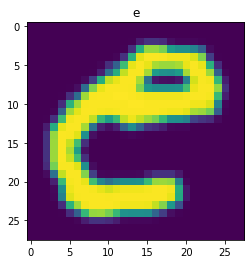

In [21]:
prediction=model.predict(test_x[0].reshape(-1,28,28,1))
y_predict=(prediction>0.5)
plt.imshow(test_x[0].reshape(28,28))
plt.title(chr(mapp[np.argmax(y_predict)]))
plt.show()


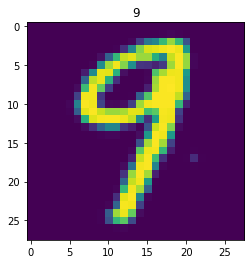

In [22]:
prediction=model.predict(test_x[1].reshape(-1,28,28,1))
y_predict=(prediction>0.5)
plt.imshow(test_x[1].reshape(28,28))
plt.title(chr(mapp[np.argmax(y_predict)]))
plt.show()


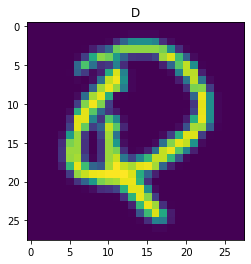

In [23]:
prediction=model.predict(test_x[2].reshape(-1,28,28,1))
y_predict=(prediction>0.5)
plt.imshow(test_x[2].reshape(28,28))
plt.title(chr(mapp[np.argmax(y_predict)]))
plt.show()


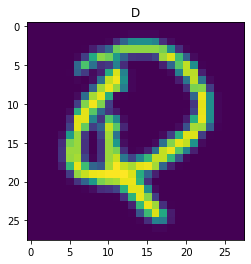

In [24]:
prediction=model.predict(test_x[3].reshape(-1,28,28,1))
y_predict=(prediction>0.5)
plt.imshow(test_x[].reshape(28,28))
plt.title(chr(mapp[np.argmax(y_predict)]))
plt.show()


In [66]:
model.evaluate(test_x,test_y)
y_pred = model.predict(test_x)
y_pred = (y_pred > 0.5)

18799/18799 [==============================] - 4s 238us/sample - loss: 0.6469 - acc: 0.7799


In [71]:
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))

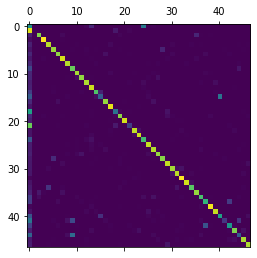

In [72]:
plt.matshow(cm)
plt.show()